In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

In [2]:
seed = 224

In [3]:
# Remember to unzip data in data/
dat = pd.read_csv("data/data.csv", encoding = "ISO-8859-1")

In [4]:
dat.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
dat[dat.CustomerID == 17850.0] # one customer bought 312 things!

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 9:01,1.85,17850.0,United Kingdom


In [37]:
edge_dat = dat.dropna(subset=['StockCode', 'CustomerID'], how='any', axis=0)

In [7]:
G = nx.MultiGraph()

In [8]:
edges = list(zip(edge_dat.StockCode, edge_dat.CustomerID.astype(int)))

In [9]:
len(edges)

406829

In [10]:
for edge in tqdm(edges):
    G.add_edge(edge[0], edge[1])

100%|██████████| 406829/406829 [00:01<00:00, 313416.79it/s]


In [11]:
len(G.nodes), len(G.edges)

(8056, 406829)

In [12]:
node_ordering = G.nodes()

In [13]:
Adj = nx.linalg.adjacency_matrix(G)

In [14]:
# Spectral Clustering
from sklearn.manifold import SpectralEmbedding
model = SpectralEmbedding(n_components=2,
                              affinity='precomputed',
                              random_state=seed,
                              n_neighbors=None,
                              n_jobs=None)
embedding = model.fit_transform(Adj.toarray())

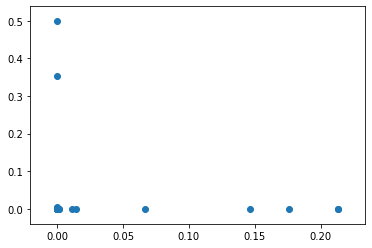

In [15]:
# plot Spectral Clustering
plt.scatter(embedding[:,0], embedding[:, 1])

In [16]:
# t-SNE
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0,
             learning_rate=200.0, n_iter=1000, n_iter_without_progress=300,
             min_grad_norm=1e-07, random_state=seed)
embedding = model.fit_transform(embedding)

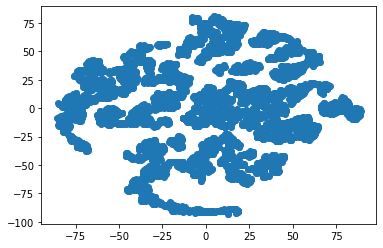

In [17]:
# plot t-SNE
plt.scatter(embedding[:,0], embedding[:, 1])

In [19]:
embedding = pd.DataFrame(embedding, index=node_ordering)

In [20]:
embedding.head()

,0,1
85123A,61.862476,37.975609
17850,8.484139,12.555213
71053,53.288174,53.940304
84406B,51.879417,13.898298
84029G,78.329941,-1.661400


Text(0.5, 1.0, 't-SNE, by stock vs. customer')

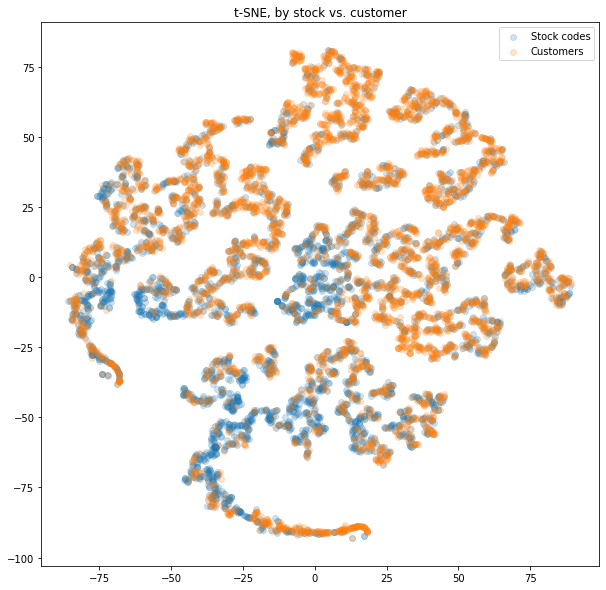

In [38]:
plt.figure(figsize=(10, 10))
group1 = edge_dat.StockCode.unique()
group2 = edge_dat.CustomerID.unique()
plt.scatter(embedding.loc[group1].iloc[:,0],
            embedding.loc[group1].iloc[:,1], alpha=0.2, label="Stock codes")
plt.scatter(embedding.loc[group2].iloc[:,0],
            embedding.loc[group2].iloc[:,1], alpha=0.2, label="Customers")
plt.legend()
plt.title("t-SNE, by stock vs. customer")

Text(0.5, 1.0, 't-SNE, by color')

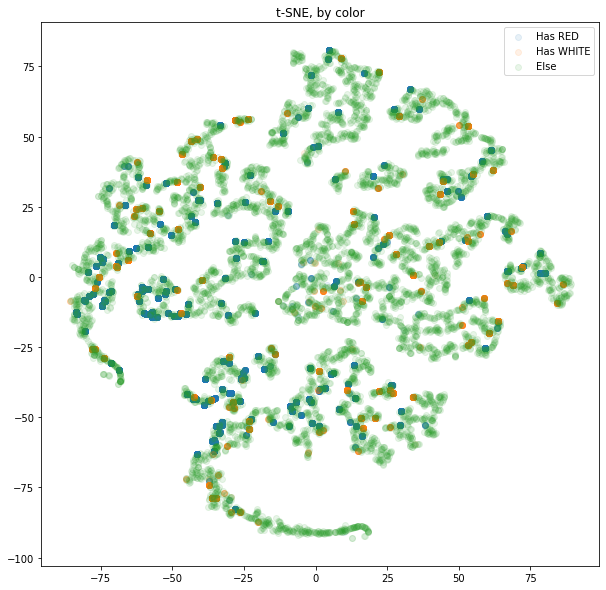

In [49]:
plt.figure(figsize=(10, 10))
group1 = edge_dat[edge_dat.Description.str.contains("RED")].StockCode
group2 = edge_dat[edge_dat.Description.str.contains("WHITE")].StockCode
group3 = embedding.index.difference(pd.concat([group2, group1]))

plt.scatter(embedding.loc[group1].iloc[:,0],
            embedding.loc[group1].iloc[:,1], alpha=0.1, label="Has RED")
plt.scatter(embedding.loc[group2].iloc[:,0],
            embedding.loc[group2].iloc[:,1], alpha=0.1, label="Has WHITE")
plt.scatter(embedding.loc[group3].iloc[:,0],
            embedding.loc[group3].iloc[:,1], alpha=0.1, label="Else")
plt.legend()
plt.title("t-SNE, by color")

In [18]:
# Slow - only draw subgraphs
# nx.draw_networkx(G, pos=None, arrows=True, with_labels=True)